<a href="https://colab.research.google.com/github/sdutoi/images/blob/main/Copy_of_ex1_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [3]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [4]:
# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /content/x_train.txt
100% 64.1M/64.1M [00:03<00:00, 18.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /content/x_test.txt
100% 65.2M/65.2M [00:02<00:00, 22.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /content/y_train.txt
100% 480k/480k [00:00<00:00, 88.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /content/y_test.txt
100% 480k/480k [00:00<00:00, 113MB/s]


In [5]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

### (jump to 20 lang subset then feature engineering)

In [ ]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head(20)

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha
5,"Mudde 14, 2012tti, TNQ USA raxibacumab antiraa...",orm
6,"Kiribati is 't 174e land op de wereld, nao Saõ...",lim
7,He was a economics graduate from Elphinstone C...,guj
8,براعظم ایشیاء تے یورپ اتے پھیلے ہوئے دیس ترکی ...,pnb
9,Vanwehe zen Gentsen ofkomst wor 't een ok wè G...,zea


In [ ]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(len(labels))

235



### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.


In [ ]:
# TODO: Inspect the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117500 entries, 0 to 117499
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    117500 non-null  object
 1   label   117500 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [ ]:
# number of entries per label in training set
pd.set_option('display.max_rows', None)
train_df['label'].value_counts()

,count
label,
ltz,500
est,500
swe,500
nav,500
mwl,500
pol,500
rue,500
vec,500
nds,500


In [ ]:
# and in test set
test_df['label'].value_counts()

,count
label,
ckb,500
mwl,500
nld,500
tet,500
ace,500
tur,500
cdo,500
mhr,500
tgk,500


In [ ]:
# Adjust pandas display options to show full text
pd.set_option('display.max_colwidth', None)

In [ ]:
train_df.head(15)

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning paigutati mausoleumi. Surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke. 1962. aastal viidi ta surnukeha mausoleumist ära ja kremeeriti. Zlíni linn kandis aastatel 1949–1989 nime Gottwaldov. Ukrainas Harkivi oblastis kandis Zmiivi linn aastatel 1976–1990 nime Gotvald.,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng). The Jesuits and the Sino-Russian treaty of Nerchinsk (1689): the diary of Thomas Pereira. Bibliotheca Instituti historici S. I., 99-0105377-3 ; 18. Rome. Libris 677492",swe
2,"भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षेत्रीय आह्वान, उत्तेजनासभ एवम प्रयत्नसँ प्रेरित, भारतीय राजनैतिक सङ्गठनद्वारा सञ्चालित अहिंसावादी आ सैन्यवादी आन्दोलन छल, जेकर एक समान उद्देश्य, अङ्ग्रेजी शासनक भारतीय उपमहाद्वीपसँ जडीसँ उखाड फेकनाई छल। ई आन्दोलनक शुरुआत १८५७ मे भेल सिपाही विद्रोहक मानल जाइत अछि। स्वाधीनताक लेल हजारो लोग अपन प्राणक बलि देलक। भारतीय राष्ट्रीय कांग्रेस १९३० कांग्रेस अधिवेशन मे अङ्ग्रेजसँ पूर्ण स्वराजक मांग केने छल।",mai
3,"Après lo cort periòde d'establiment a Basilèa, tornèt a viatjar, venent un «sabent caminaire», . Sa preséncia es atestada a Colmar ont escriguèt sus la sifilis e Bertheonea sive chirurgia minor, manual per «legit» e interpretar los signes corporals, a Esslingen (aprigondèt sas coneissença en sciéncias ocultas), Nurembèrg (novembre de 1529: faguèt la coneissénça del mistic Sébastien Franck, Beratzhausen (1530: comencèt a escriure de la teologia e lo Paragranum), Sankt Gallen (1531: acabèt Liber paramirum), Appenzell (1533), Sterzing (1534 : sonhava de la pèsta), Merano, Sant Moritz, Pfäffers (Bad Ragaz), Ulm, Augsborg (1536), Munic, Eferding (1537), Kromau (en Moràvia: escriguèt son Astronomia magna), Viena (1537-1538, lo recebèt Ferrand I del Sant Empèri, rei de Boèlia e d'Ongria, rei dels Romans), Villach (mai de 1538). En païses minièrs (val d’Inn), a Appenzell, escriguèt sus las malautiás dels minors (1533); dins las vilas d’aigas (coma Pfäffers) estudièt los benfachs de las aigas termalas (1535), fondant atal la medecina professionala e la balneoterapia.",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung) เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม,tha
5,"Mudde 14, 2012tti, TNQ USA raxibacumab antiraaksii qilleensaan seenuu yaaluu akka limmoodhaan kennamu eeyyame. Raxibacumab antiibodii monoclonial kan summii Baasiles Antiraasisiin uummamu sana halaksiisa. Summiin kun tishuurratti miidhama hin fayyinee fi du'a fida. Antiibodii monoclonial kun pirootiinii antiibodii namaa fakkaatu yoo ta'u qaamota alaa nama keessa seenan kan akka baakteeriyaa fi vaayiresii barbaadanii balleessa.",orm
6,"Kiribati is 't 174e land op de wereld, nao Saõ Tomé en Príncipe en veur Bahrein. 't Besteit oet inkel tientalle eilendsjes, allemaol koraoleilendsjes (väölal atolle), die naovenant mer kort bove zie oetkoume. De eilendsjes groepere ziech zoe: Banaba (e geïsoleerd eiland in 't weste), de Gilberteilen (16 atolle in 't midde), de Fenikseilen (8 atolle en koraoleilen in 't zuidzuidooste) en de Lijneilen (8 atolle en ei rif in 't ooste; dao-oonder Kiritimati, 't groetste bovezies atol op de wereld). De mierderheid vaan de eilen is bewoend. Banaba haolt de veur koraoleilen oetzunderleke huugde vaan 81 meter, de res vaan 't land löp acuut gevaar veur es gevolg vaan 't breujkaseffek oonder te loupe.",lim
7,"He was a economics graduate from Elphinstone College, Mumbai. He was an industrialist in plastics business. He served as a president of Gujarat Chamber of Commerce and Industry in 1990s.",guj
8,براعظم ایشیاء تے یورپ اتے پھیلے ہوئے دیس ترکی دے 81 صوبے نیں ۔ اس دے بوہتے صوبےآں دے ناں اس صوبے دے صدرمقام شہر اتے نیں ۔ صوبہ ہاتے ترکی دے 81 صوبےآں چوں اک اے تے اسدا انتظامی مرکز انطاکیہ شہر اے ۔,pnb
9,"Vanwehe zen Gentsen ofkomst wor 't een ok wè G

In [ ]:
# Select a random item to inspect
random_instance = test_df.sample(1)

# Print the contents of the 'text' column at index 0 (there is only 1 item)
print('**** INPUT ****')
print(random_instance['text'].iloc[0])

# Print the contents of the 'label' column at index 0 (there is only 1 item)
print('*** TARGET ****')
print(random_instance['label'].iloc[0])

**** INPUT ****
En il diever linguistic general designeschan ils terms ‹romantica› e ‹romantic› oz per ordinari in stadi sentimental, magari er collià cun brama. Tipicas èn cumbinaziuns da pleds sco ‹muments romantics› u ‹ina cuntrada romantica›. Per ‹in’affera romantica› è er vegnì en diever il term ‹romanza› che designava oriundamain il gener litterar romanza. Er en quest pled sa manifestescha la transfurmaziun da l’idea romantica da l’epoca istorica en il mund dad oz.
*** TARGET ****
roh


### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [ ]:
language_codes = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'nno', 'jpn', 'tsn', 'xho', 'swa', 'rus', 'afr', 'ell', 'zh-yue', 'aym', 'fao', 'mai', 'hau', 'por']


In [ ]:
## check to see if selected language codes are in the data

# Get the unique labels in DataFrame
unique_labels_in_df = train_df['label'].unique()

# Check which codes are present and which are missing
present_codes = [code for code in language_codes if code in unique_labels_in_df]
missing_codes = [code for code in language_codes if code not in unique_labels_in_df]

print("Present codes:", present_codes)
print("Missing codes:", missing_codes)

print(len(present_codes))

Present codes: ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'nno', 'jpn', 'tsn', 'xho', 'swa', 'rus', 'afr', 'ell', 'zh-yue', 'aym', 'fao', 'mai', 'hau', 'por']
Missing codes: []
20


There seem to be 2 variants of Norwegian in the dataset - *Bokmål* (nob) and *Nynorsk* (nno). Zulu is lacking.

In [ ]:
! head -n 5 x_test.txt

Ne l fin de l seclo XIX l Japon era inda çconhecido i sótico pa l mundo oucidental. Cula antroduçon de la stética japonesa, particularmente na Sposiçon Ounibersal de 1900, an Paris, l Oucidente adquiriu un apetite ansaciable pul Japon i Heiarn se tornou mundialmente coincido pula perfundidade, ouriginalidade i sinceridade de ls sous cuntos. An sous radadeiros anhos, alguns críticos, cumo George Orwell, acusórun Heiarn de trasferir sou nacionalismo i fazer l Japon parecer mais sótico, mas, cumo l'home qu'oufereciu al Oucidente alguns de sous purmeiros lampeijos de l Japon pré-andustrial i de l Período Meiji, sou trabalho inda ye balioso até hoije.
Schiedam is gelegen tussen Rotterdam en Vlaardingen, oorspronkelijk aan de Schie en later ook aan de Nieuwe Maas. Per 30 april 2017 had de gemeente 77.833 inwoners (bron: CBS). De stad is vooral bekend om haar jenever, de historische binnenstad met grachten, en de hoogste windmolens ter wereld.
ГIурусаз батальонал, гьоркьор гIарадабиги лъун, у

In [ ]:
! head -n 5 y_test.txt

mwl
nld
ava
tcy
bjn


## 20 language subset

In [6]:
language_codes = ['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'nno', 'jpn', 'tsn', 'xho', 'swa', 'rus', 'afr', 'ell', 'zh-yue', 'aym', 'fao', 'mai', 'hau', 'por']


In [7]:
# Create training subset
subset_x_train = [x for x,y in zip(x_train, y_train) if y in language_codes]
subset_y_train = [y for y in y_train if y in language_codes]

# Create testing subset
subset_x_test = [x for x,y in zip(x_test, y_test) if y in language_codes]
subset_y_test = [y for y in y_test if y in language_codes]

In [8]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

# initialize and fit label encoder
label_encoder = LabelEncoder().fit(subset_y_train)

# transform training and test data
encoded_y_train = label_encoder.transform(subset_y_train)
encoded_y_test = label_encoder.transform(subset_y_test)

label_encoder.classes_
encoded_y_train
encoded_y_test

array([10,  8, 17, ...,  4,  2, 15])

### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# TODO: Define a very basic pipeline using a CountVectorizer and a LogisticRegression classifier



In [10]:

# added max_features parameter so that we don't end up possibly computing huge feature matrices for rare character combinations
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=10000)),
    ('classifier', LogisticRegression(max_iter=1000))
])


## cross validation

In [ ]:
# TODO: Run a cross validation to estimate the model's expected performance

# 5-fold cross-validation on our subset of 20 languages, using our subset_x_train and our encoded_y_train as parameters
cv_scores = cross_val_score(pipeline, subset_x_train, encoded_y_train, cv=5, scoring='accuracy')

# cross-validation scores and the mean score as a baseline
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

Cross-validation scores:  [0.9215 0.9175 0.9285 0.9245 0.921 ]
Mean cross-validation score:  0.9226000000000001



### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [11]:
# TODO: Data cleaning/Feature engineering steps
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer


# Custom functions to calculate additional text features
def word_length_stats(text):
    word_lengths = [len(word) for word in text.split()]
    return [np.mean(word_lengths), np.std(word_lengths), np.median(word_lengths)]

# Function to count various punctuation and language-specific symbols
def punctuation_and_symbol_count(text):
    punctuation_counts = {
        'comma': text.count(','),
        'period': text.count('.'),
        'question': text.count('?'),
        'exclamation': text.count('!'),
        'colon': text.count(':'),
        'semicolon': text.count(';'),
        'quote': text.count('"'),
        'parentheses': text.count('(') + text.count(')'),
        # Language-specific symbols
        'inverted_question': text.count('¿'),
        'inverted_exclamation': text.count('¡'),
        'french_quotes': text.count('«') + text.count('»'),
        'german_quotes': text.count('„') + text.count('“')
    }
    return list(punctuation_counts.values())

# Wrapping custom functions for use in the pipeline
word_length_transformer = FunctionTransformer(lambda x: np.array([word_length_stats(doc) for doc in x]))
punctuation_transformer = FunctionTransformer(lambda x: np.array([punctuation_and_symbol_count(doc) for doc in x]))

# Building the pipeline with feature union
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('char_ngrams', CountVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000)),
        ('word_ngrams', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
        ('word_length_stats', word_length_transformer),
        ('punctuation_count', punctuation_transformer)
    ])),
    ('classifier', LogisticRegression(max_iter=1000))
])


---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [ ]:
# TODO: GridSearchCV

from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Add 'elasticnet' only if you set 'solver' to 'saga'
    'classifier__solver': ['liblinear'],        # 'saga' supports elasticnet, 'liblinear' doesn't
    'features__char_ngrams__ngram_range': [(1, 2), (1, 3)],  # Character n-grams
    'features__word_ngrams__ngram_range': [(1, 1), (1, 2)],  # Word n-grams
    'features__char_ngrams__max_features': [5000, 10000],     # Adjust to control dimensionality
    'features__word_ngrams__max_features': [3000, 5000]
}

# Instantiate GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,  # Cross-validation splits, adjust as needed
    scoring='accuracy',  # Or any other metric suitable for your task
    verbose=1,
    n_jobs=-1  # Use all processors to speed up
)

# Assuming you have your data ready in X and y
grid_search.fit(subset_x_train, subset_y_train)

# Display best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'features__char_ngrams__max_features': 10000, 'features__char_ngrams__ngram_range': (1, 3), 'features__word_ngrams__max_features': 3000, 'features__word_ngrams__ngram_range': (1, 1)}
Best cross-validation score:  0.9751998295210446


### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

📝❓ What is the advantage of grid search cross-validation?


In [ ]:
# TODO: Select the best model based on the GridSearch results
# Access cv_results_ from the GridSearchCV instance
cv_results = grid_search.cv_results_

# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(cv_results)


In [ ]:
# Sort by the mean test score in descending order
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)

# Display the top 5 configurations
print(sorted_results[['mean_test_score', 'std_test_score', 'params']].head())

    mean_test_score  std_test_score  \
28           0.9752        0.001352   
29           0.9752        0.001352   
30           0.9752        0.001352   
31           0.9751        0.001473   
21           0.9746        0.001479   

                                               params  
28  {'classifier__penalty': 'l2', 'classifier__sol...  
29  {'classifier__penalty': 'l2', 'classifier__sol...  
30  {'classifier__penalty': 'l2', 'classifier__sol...  
31  {'classifier__penalty': 'l2', 'classifier__sol...  
21  {'classifier__penalty': 'l2', 'classifier__sol...  


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [ ]:
# TODO: Evaluate the model by inspecting the predictions on the heldout test set
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Use the best model to predict languages on the test split
predictions = best_model.predict(subset_x_test)

from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(subset_y_test, predictions)
print("Test set accuracy: ", accuracy)

# Detailed classification report
print(classification_report(subset_y_test, predictions))


Test set accuracy:  0.9807
              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       500
         aym       0.99      0.98      0.99       500
         dan       0.96      0.96      0.96       500
         deu       0.96      0.98      0.97       500
         ell       1.00      0.99      0.99       500
         eng       0.90      0.98      0.94       500
         fao       1.00      1.00      1.00       500
         hau       1.00      0.99      1.00       500
         jpn       1.00      0.99      0.99       500
         mai       1.00      0.98      0.99       500
         nld       1.00      0.99      0.99       500
         nno       0.94      0.97      0.96       500
         nob       0.95      0.91      0.93       500
         por       0.98      0.99      0.99       500
         rus       0.99      1.00      1.00       500
         swa       0.97      0.98      0.98       500
         swe       1.00      1.00      1.00       500


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?

📝❓ What are some possible reasons for why it fails in these cases?

In [ ]:
# TODO: Inspect the model's predcitions on the different classes

# for comments see lab report

import numpy as np
import pandas as pd

# Find indices where the prediction is wrong
misclassified_idx = np.where(predictions != subset_y_test)[0]  # This returns an array of indices

# Convert subset_x_test and subset_y_test to NumPy arrays for indexing
subset_x_test = np.array(subset_x_test)
subset_y_test = np.array(subset_y_test)

# Create a DataFrame to inspect misclassified examples using integer indices
misclassified_df = pd.DataFrame({
    'Text': subset_x_test[misclassified_idx],  # The original text
    'True Label': subset_y_test[misclassified_idx],  # True language label
    'Predicted': predictions[misclassified_idx]  # Predicted language label
})

# Inspect cases where texts were misclassified as English (eng)
non_eng_to_eng_df = misclassified_df[misclassified_df['Predicted'] == 'eng']

# Display the misclassified texts
print(non_eng_to_eng_df)


                                                  Text True Label Predicted
0    ref name="paulwalters">Navanethem Pillay is qu...        mai       eng
1    This became increasingly awkward as railways र...        mai       eng
4    With K Norr and B McElmurry. "AIDS prevention ...        tsn       eng
5    Spencer M. Di Scala, Ph.D., President of the D...        ell       eng
12   Herman, Arthur: How the Scots Invented the Mod...        nob       eng
22   The ovum is the largest cell in the human body...        xho       eng
23   An office is generally a room or other area wh...        tsn       eng
24   Most metals are strong, dense, and good conduc...        xho       eng
29   Standard time zones can be defined by geometri...        mai       eng
31   It is not known whether chenodiol passes into ...        xho       eng
32   E-Africa: Council for the Development of Socia...        xho       eng
41   Douglas, Carstairs. 1990. Chinese-English Dict...     zh-yue       eng
42   Amundse

---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [ ]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.8 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive to save the transformed data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to extract feature names after fitting the pipeline
def get_feature_names(pipeline, sample_texts):
    # Fit the pipeline to ensure transformers are properly initialized
    pipeline.fit(sample_texts, np.random.randint(0, 2, size=len(sample_texts)))

    feature_names = []

    # Extract feature names for each part of the FeatureUnion
    for name, transformer in pipeline.named_steps["features"].transformer_list:
        if hasattr(transformer, "get_feature_names_out"):
            # Get feature names for TfidfVectorizer and CountVectorizer
            feature_names.extend(transformer.get_feature_names_out())
        elif name == "word_length_stats":
            # Manually define feature names for word length stats
            feature_names.extend(
                ["mean_word_length", "std_word_length", "median_word_length"]
            )
        elif name == "punctuation_count":
            # Manually define feature names for punctuation count features
            feature_names.extend(
                [
                    "comma_count",
                    "period_count",
                    "question_count",
                    "exclamation_count",
                    "colon_count",
                    "semicolon_count",
                    "quote_count",
                    "parentheses_count",
                    "inverted_question_count",
                    "inverted_exclamation_count",
                    "french_quotes_count",
                    "german_quotes_count",
                ]
            )

    return feature_names


In [ ]:
# Fit the pipeline with your training data
pipeline.fit(subset_x_train, subset_y_train)

# Extract feature names using the fitted pipeline and training data
feature_names = get_feature_names(pipeline, subset_x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Map language codes to their respective indices using the label encoder
# Define the target languages
target_languages = ["eng", "swe", "nno", "jpn"]

# Use the LabelEncoder to get the numerical values for each target language
language_indices = {lang: label_encoder.transform([lang])[0] for lang in target_languages}

# Print the language indices to verify
print("Language indices:", language_indices)


Language indices: {'eng': 5, 'swe': 16, 'nno': 11, 'jpn': 8}


In [ ]:
# to load next session

import joblib

# Load the SHAP values from Google Drive
small_shap_values = joblib.load('/content/drive/My Drive/small_shap_values.pkl')


In [ ]:


# Step 2: Load the transformed training and test data from Google Drive
from scipy.sparse import load_npz

# Paths to the saved files
train_path = "/content/drive/My Drive/X_train_transformed.npz"
test_path = "/content/drive/My Drive/X_test_transformed.npz"

# Load the transformed sparse matrices
X_train_transformed = load_npz(train_path)
X_test_transformed = load_npz(test_path)

# Step 3: Convert the sparse matrix to a dense array for SHAP calculations
X_train_array = X_train_transformed.toarray()

# Step 4: Use a very small subset of samples for the background and test data
background_data = X_train_array[:5]  # Only 5 samples for background
small_X_test_array = X_test_transformed[:50].toarray()  # Only 50 samples for test data


## adjust feature names manually

In [ ]:
def adjust_feature_names(feature_names):
    adjusted_names = []
    for name in feature_names:
        # Check if the name is a character n-gram (e.g., length 1-3 or contains non-Latin characters)
        if len(name) <= 3 or any(ord(char) > 127 for char in name):
            adjusted_names.append(f"char_ngram: {name}")
        # Otherwise, keep it as is for custom features or recognizable word features
        else:
            adjusted_names.append(name)
    return adjusted_names

# Adjust the feature names using the improved function
adjusted_feature_names = adjust_feature_names(feature_names)

# Display some adjusted feature names to check the result
print("Adjusted feature names:")
print(adjusted_feature_names[:20])  # Print the first 20 for verification


Adjusted feature names:
['char_ngram:  ', 'char_ngram:  "', 'char_ngram:  "d', 'char_ngram:  "m', 'char_ngram:  "s', 'char_ngram:  "t', 'char_ngram:  %', 'char_ngram:  % ', 'char_ngram:  &', 'char_ngram:  & ', "char_ngram:  '", "char_ngram:  'n", 'char_ngram:  (', 'char_ngram:  (*', 'char_ngram:  (1', 'char_ngram:  (2', 'char_ngram:  (a', 'char_ngram:  (b', 'char_ngram:  (c', 'char_ngram:  (d']


In [ ]:
# Step 5: Extract and print the top 20 features for each target language
for lang, idx in language_indices.items():
    # Get the SHAP values for this language (class)
    shap_vals_for_lang = small_shap_values[idx]  # Extract the array for this class

    # Calculate mean absolute SHAP values (already provided as a 1D array per class)
    mean_abs_shap_vals = np.abs(shap_vals_for_lang)

    # Get the top 20 features by mean absolute SHAP values
    top_features_indices = np.argsort(mean_abs_shap_vals)[-20:][::-1]
    top_features = [
        (adjusted_feature_names[i], mean_abs_shap_vals[i]) for i in top_features_indices
    ]

    print(f"\nTop 20 features for {lang}:")
    for feature, importance in top_features:
        print(f"{feature}: {importance}")

    # Save the top 20 features for each language to a CSV file
    top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])
    top_features_df.to_csv(f'/content/drive/My Drive/top_20_features_{lang}.csv', index=False)

print("Top 20 features for each language saved to Google Drive.")



Top 20 features for eng:
char_ngram: a: 6.99569225540868
char_ngram: e: 4.969270090836636
char_ngram: g: 3.3618380529638974
char_ngram: n : 2.0614145997402997
char_ngram: i: 1.9817624938774714
char_ngram: b: 1.9716952256453948
char_ngram: mp: 1.919737267485155
char_ngram: o: 1.902997145528699
char_ngram: g : 1.8450945599416504
char_ngram: å : 1.7619692277713725
char_ngram: ्: 1.7221900625509727
char_ngram:  r: 1.63449857830844
char_ngram: le: 1.5198053581329922
char_ngram: ne : 1.4652833551818305
char_ngram: ा: 1.4096959618979983
char_ngram:  i : 1.248739276938914
char_ngram: en: 1.2326445789053493
char_ngram: l: 1.2298936022069455
char_ngram:  m: 1.2193396744114247
char_ngram: र: 1.2177283408376907

Top 20 features for swe:
char_ngram: a: 20.41765995473929
char_ngram: le: 9.878734827864449
char_ngram: e: 8.60065977260187
char_ngram: g: 8.404595132409744
char_ngram: o : 8.153796884130568
char_ngram: ets: 7.782755740321593
char_ngram: a : 7.636083160739133
char_ngram: ts: 7.46918518382

In [ ]:
### Loading the features in a new session:

import pandas as pd

# Mount Google Drive to access the saved CSV files
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV files into DataFrames
eng_features = pd.read_csv('/content/drive/My Drive/top_20_features_eng.csv')
swe_features = pd.read_csv('/content/drive/My Drive/top_20_features_swe.csv')
nno_features = pd.read_csv('/content/drive/My Drive/top_20_features_nno.csv')
jpn_features = pd.read_csv('/content/drive/My Drive/top_20_features_jpn.csv')

# Display the first few rows of each DataFrame to verify
print("Top 20 features for English:")
print(eng_features.head())

print("\nTop 20 features for Swedish:")
print(swe_features.head())

print("\nTop 20 features for Norwegian (Nynorsk):")
print(nno_features.head())

print("\nTop 20 features for Japanese:")
print(jpn_features.head())


Mounted at /content/drive
Top 20 features for English:
  Feature  Importance
0       a    6.995692
1       e    4.969270
2       g    3.361838
3      n     2.061415
4       i    1.981762

Top 20 features for Swedish:
  Feature  Importance
0       a   20.417660
1      le    9.878735
2       e    8.600660
3       g    8.404595
4      o     8.153797

Top 20 features for Norwegian (Nynorsk):
  Feature  Importance
0       a    2.928429
1       ्    1.722190
2       e    1.529006
3       ा    1.409696
4       र    1.217728

Top 20 features for Japanese:
  Feature  Importance
0       a   11.469681
1       e    7.071654
2       c    6.251333
3      le    4.559416
4       o    3.405363


In [ ]:
## Check if NNO really is Norwegian...?!

# Filter training examples with the label 'nno'
nno_train_examples = train_df[train_df['label'] == 'nno']

# Print out 5 random examples
print("5 Example texts from the training set with label 'nno':")
print(nno_train_examples['text'].sample(5, random_state=42).tolist())


5 Example texts from the training set with label 'nno':
['Park Geun-hye (fødd 2. februar 1952) var den ellevte presidenten i Sør-Korea frå 2013 fram til ho vart avsatt i 2017. Geun-hye var den fyrste kvinnelege presidenten i landet. Ho er dotter av den sørkoreanske politikaren Park Chung-hee, og vart vald til president 25. februar 2013. Ho representerer partiet Saenuri - «Ny verd».', 'Av tillitsverv kan nemnast at Karlsen var formann 1948-53 i Sør-Trøndelag Tjenestemannslag, landsstyremedlem 1951-66 i Norsk Tjenestemannslag og 1958-66 medlem i representantskapet i Landsorganisasjonen.', 'Ruta vart starta opp av av brørne Leif og Karl Håland og vart bilførande i 1934. I dei første 30 åra gjekk enkelte ruteturar innom Ytre Arna, men desse turane fall ut ved årsskiftet 1964-1965. Karl Håland, som dreiv ruta åleine etter at broren døydde i 1963, fekk tidleg på 1970-talet stadig sterkare press frå vegmyndigheitene om å gje frå seg ferjerutekonsesjonen. Det var det nye ferjeselskapet Bergen 

## Plotting results

In [ ]:
## steps to reduce the warning messages between plots
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", message="Glyph .* missing from current font")


In [ ]:
import pandas as pd

# Assuming you have DataFrames like eng_features, swe_features, etc.
# Replace the 'Feature' column with the adjusted feature names

# Example for English:
eng_features['Feature'] = [adjusted_feature_names[i] for i in range(len(eng_features))]

# Example for Swedish:
swe_features['Feature'] = [adjusted_feature_names[i] for i in range(len(swe_features))]

# Example for Norwegian (Nynorsk):
nno_features['Feature'] = [adjusted_feature_names[i] for i in range(len(nno_features))]

# Example for Japanese:
jpn_features['Feature'] = [adjusted_feature_names[i] for i in range(len(jpn_features))]


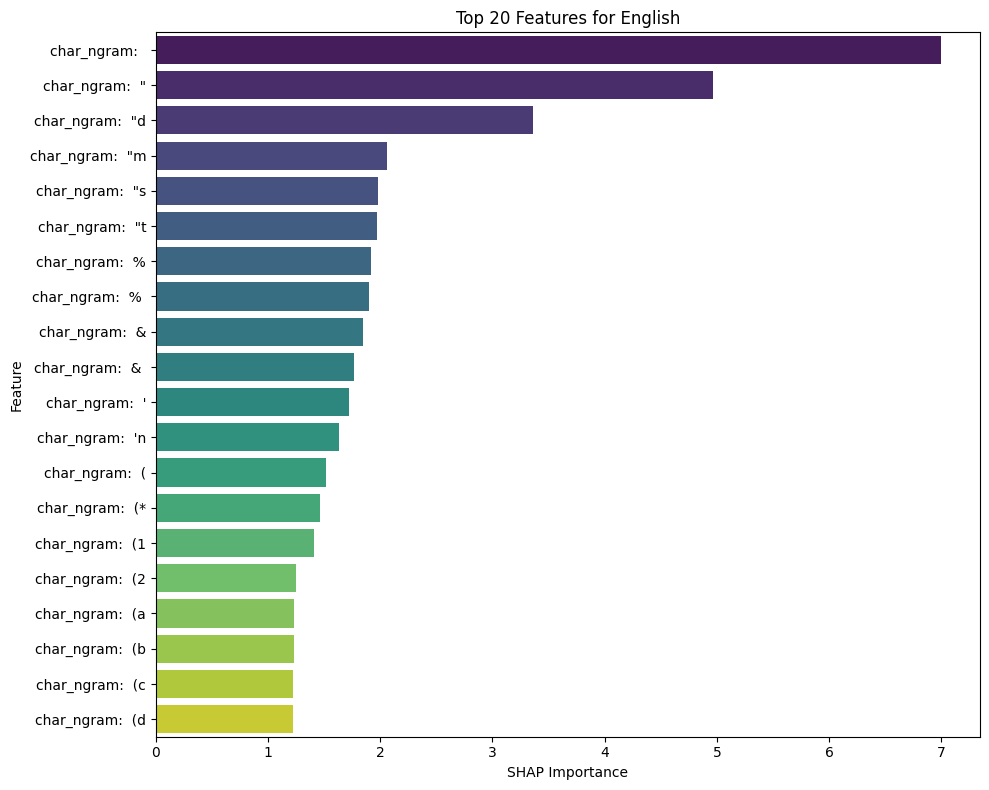

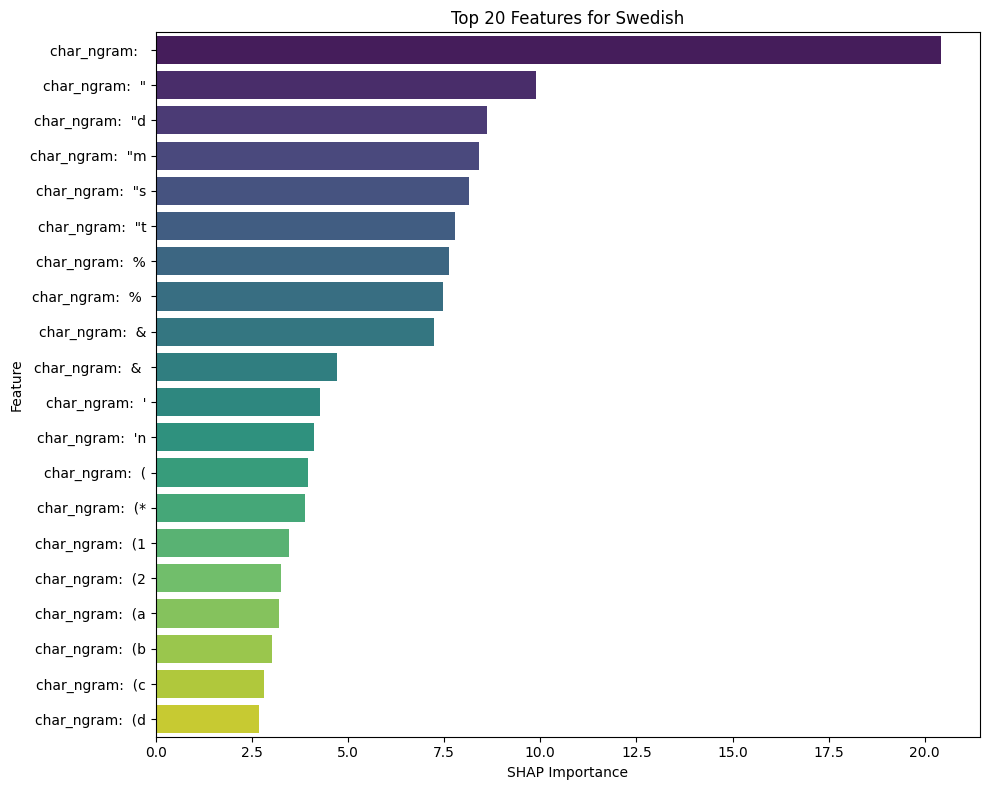

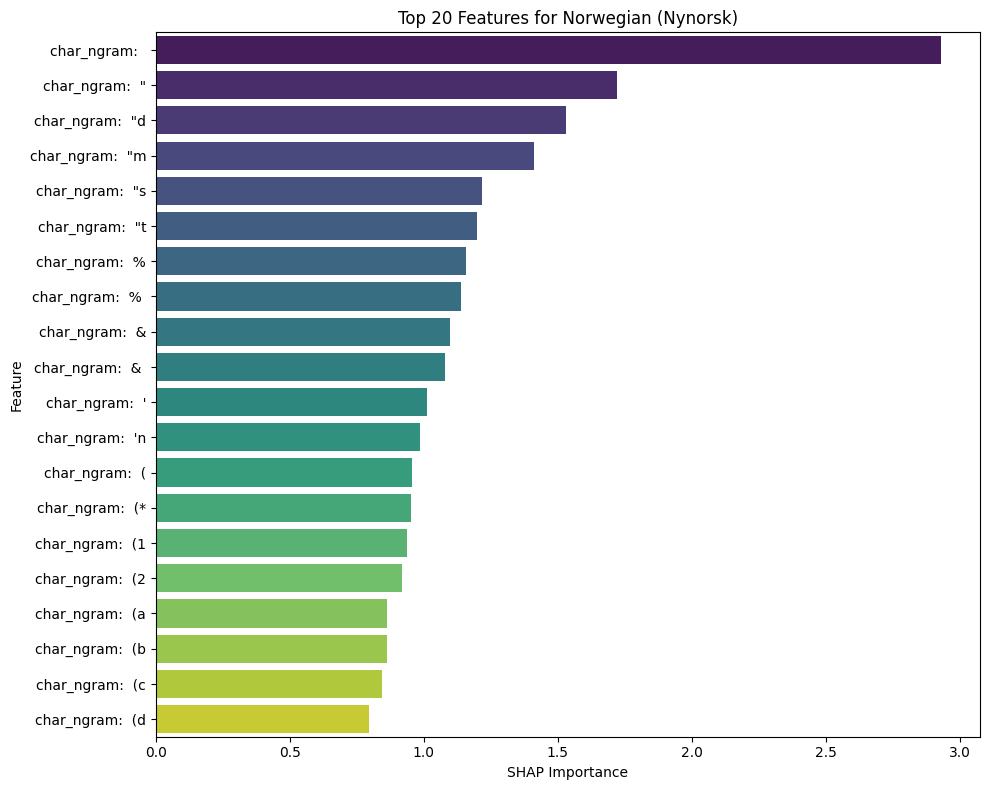

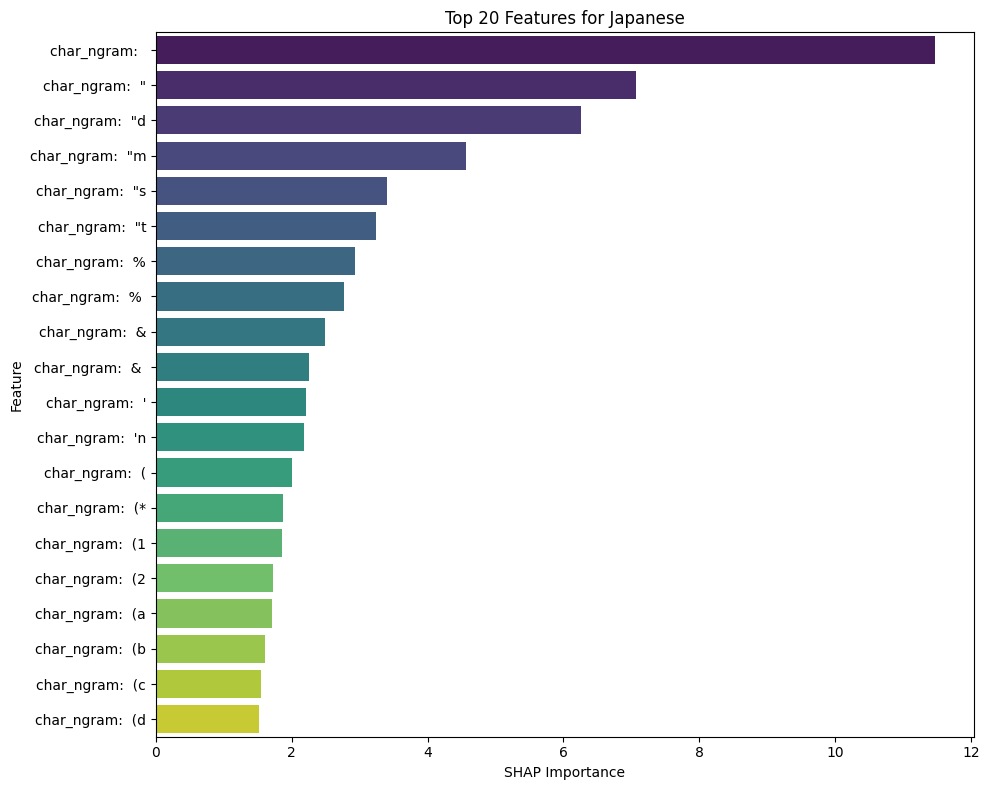

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot top 20 features for a given language DataFrame without warnings
def plot_top_features(df, language_code):
    plt.figure(figsize=(10, 8))
    sns.barplot(
        data=df,
        x='Importance',
        y='Feature',
        hue='Feature',  # Use 'Feature' as the hue to align with Seaborn's recommendation
        dodge=False,    # Ensure a single plot for each feature
        palette='viridis'
    )
    plt.title(f'Top 20 Features for {language_code}')
    plt.xlabel('SHAP Importance')
    plt.ylabel('Feature')
    plt.legend([], [], frameon=False)  # Hide the legend for a cleaner look
    plt.tight_layout()
    plt.show()


# Plot the top 20 features for each language
plot_top_features(eng_features, 'English')
plot_top_features(swe_features, 'Swedish')
plot_top_features(nno_features, 'Norwegian (Nynorsk)')
plot_top_features(jpn_features, 'Japanese')


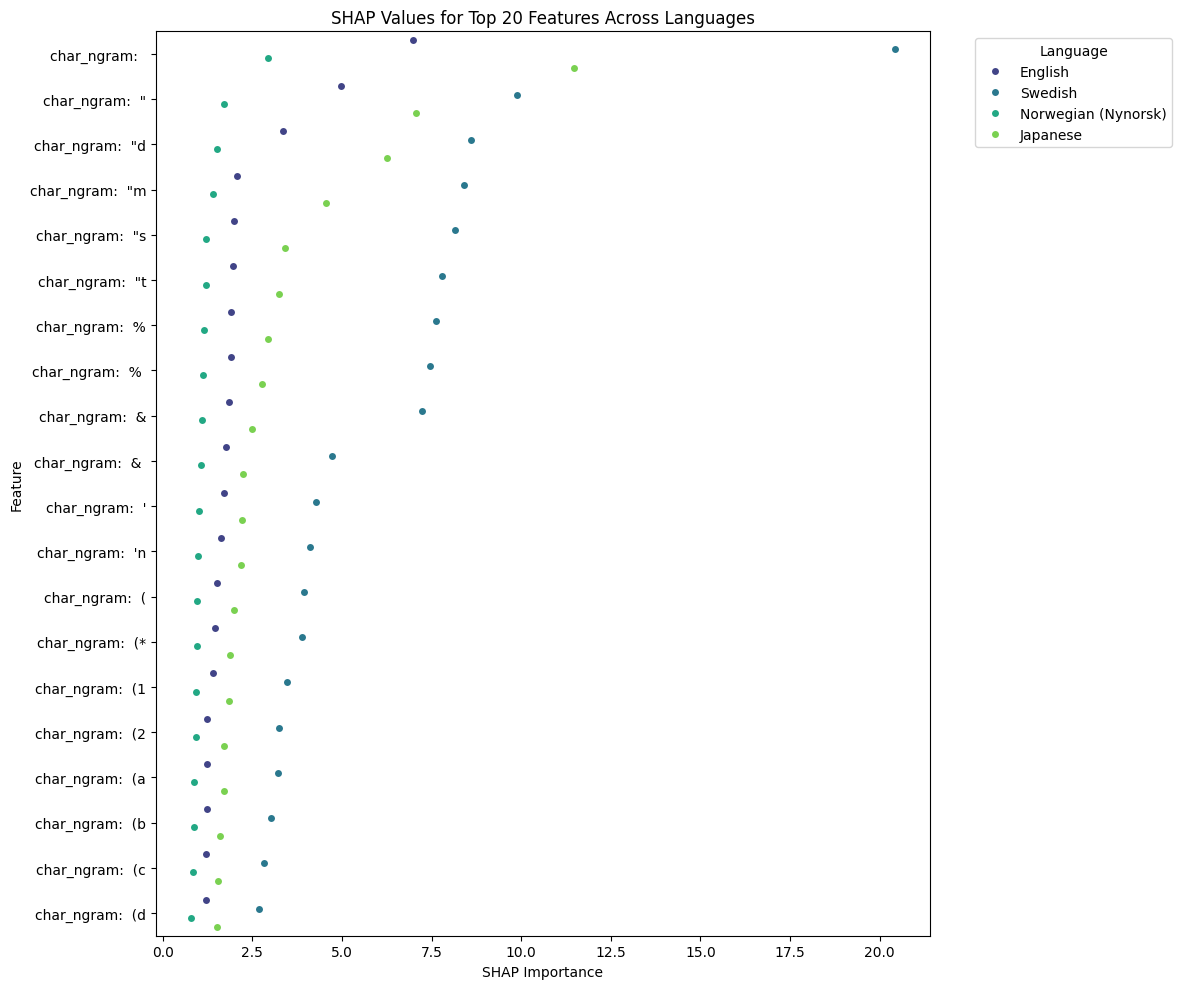

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine the top features into a single DataFrame for plotting
# Add a new column to indicate the language for each set of features
eng_features['Language'] = 'English'
swe_features['Language'] = 'Swedish'
nno_features['Language'] = 'Norwegian (Nynorsk)'
jpn_features['Language'] = 'Japanese'

# Combine all the DataFrames into a single one for easier plotting
combined_features = pd.concat([eng_features, swe_features, nno_features, jpn_features], axis=0)

# Create a figure for a beeswarm-like plot using Seaborn's stripplot
plt.figure(figsize=(12, 10))
sns.stripplot(
    data=combined_features,
    x='Importance',
    y='Feature',
    hue='Language',
    jitter=True,
    dodge=True,
    palette='viridis'
)
plt.title('SHAP Values for Top 20 Features Across Languages')
plt.xlabel('SHAP Importance')
plt.ylabel('Feature')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [1]:
# TODO: Ablation study

from sklearn.base import BaseEstimator, TransformerMixin

class TextReducer(BaseEstimator, TransformerMixin):
    def __init__(self, max_len=None):
        self.max_len = max_len

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.max_len is not None:
            # Truncate each text to the specified max_len
            return [text[:self.max_len] for text in X]
        return X


In [12]:
from sklearn.pipeline import Pipeline

# Update your pipeline to include the TextReducer
pipeline = Pipeline([
    ('reducer', TextReducer(max_len=None)),  # This will be updated with different max_len values
    ('features', FeatureUnion([
        ('char_ngrams', CountVectorizer(analyzer='char', ngram_range=(1, 3), max_features=10000)),
        ('word_ngrams', TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)),
        ('word_length_stats', word_length_transformer),
        ('punctuation_count', punctuation_transformer)
    ])),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the different max_len values for the ablation study
max_lengths = [None, 500, 250, 150, 100, 50]
results = []

# Loop over each max_len value and perform cross-validation
for max_len in max_lengths:
    print(f"Evaluating model with max_len={max_len}")
    # Update the max_len parameter in the pipeline
    pipeline.set_params(reducer__max_len=max_len)

    # Use only the examples for the selected languages
    selected_x_train = [x for x, y in zip(subset_x_train, subset_y_train) if y in ['swe', 'hau']]
    selected_y_train = [y for y in subset_y_train if y in ['swe', 'hau']]

    # Perform cross-validation and compute the mean accuracy
    cv_scores = cross_val_score(pipeline, selected_x_train, selected_y_train, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    results.append((max_len, mean_accuracy))
    print(f"Mean accuracy for max_len={max_len}: {mean_accuracy:.4f}")

# Convert the results to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results, columns=['max_len', 'mean_accuracy'])

# Display the results
print("\nAblation Study Results:")
print(results_df)


Evaluating model with max_len=None
Mean accuracy for max_len=None: 0.9970
Evaluating model with max_len=500
Mean accuracy for max_len=500: 0.9970
Evaluating model with max_len=250
Mean accuracy for max_len=250: 0.9970
Evaluating model with max_len=150
Mean accuracy for max_len=150: 0.9980
Evaluating model with max_len=100
Mean accuracy for max_len=100: 0.9980
Evaluating model with max_len=50
Mean accuracy for max_len=50: 0.9950

Ablation Study Results:
   max_len  mean_accuracy
0      NaN          0.997
1    500.0          0.997
2    250.0          0.997
3    150.0          0.998
4    100.0          0.998
5     50.0          0.995


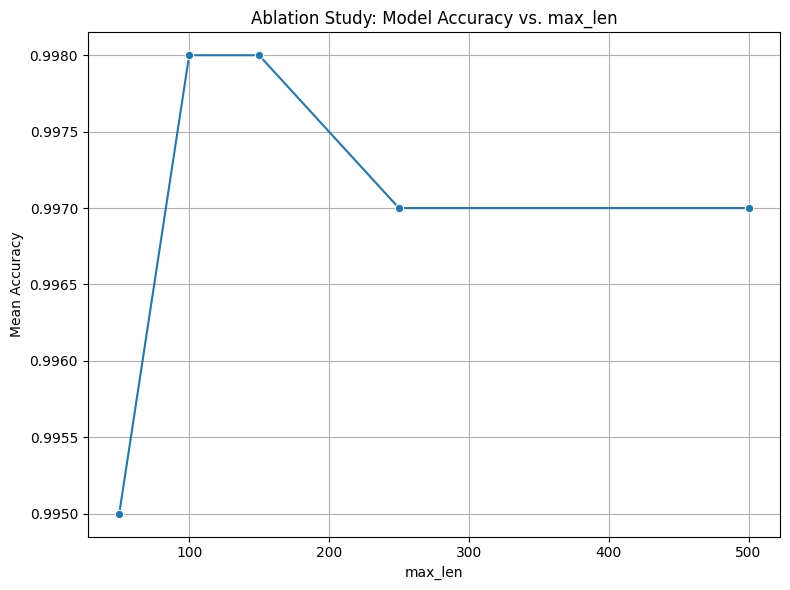

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='max_len', y='mean_accuracy', marker='o')
plt.title('Ablation Study: Model Accuracy vs. max_len')
plt.xlabel('max_len')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()


---

📝❓ Write your lab report here addressing all questions in the notebook


# Lab report

### Exploring the data
There are lots of different languages, amongst which are many with their own scripts, too.
Having a different scripts has certain limitations (common practices like splitting into tokens or removing punctuation might not be used), but for a classification task, it might prove advantageous: the scripts is a strong indicator for a certain language.

The data is distributed evenly, there are 500 instances per language in both the training and test set, which means that it should perform comparably across languages. The train-test split, however, is therefore 50/50, which deviates from the more common 80/20. Nevertheless, for this relatively simple task, we think that this is fine. The larger test set will help ensure that the model's performance is generalizable to unseen data, which is important in this multilingual context that we have, where data and its sources might be very diverse.

### Best model selection
Best parameters found:
- penalty: l2
- solver: liblinear
- char ngrams max. features: 10000
- char ngrams: uni- to trigrams
- word ngrams max. features: 5000
- word ngrams range: uni- to bigrams
This configuration led to the best cross-validation score:  0.9752

Grid search cross-validation systematically searches for the best combination of hyperparameters by evaluating all possible options across multiple train-test splits This ensures robust and reliable model performance while minimizing overfitting.

### Model evaluation
Our model achieves an F1-score of 0.98 on the testset. Precision and recall are usually in a similar range, i.e., it is generally not the case that one is very high an the other one rather low. English is the only case where we have such a situation, with a relatively low precision of 0.90, but a high recall of 0.98. This means that a number of non-english texts were labelled as english. Looking at the evaluation data, it is striking that some (but not all) other germanic languages like Danish, German and Norwegian had a relatively low score. While the two varieties of Norwegian might have been a source of confusion between them, German and Danish might have been labelled as English. However, one would have to look at this in more detail to accept or reject this hypothesis.

### Error analysis
We noticed that the model performed least well in 3 cases: eng (Enlgish), nno (Nynorsk) and nob (Bokmål). It is obvious that if two languages are very similar (Nynorsk and Bokmål are both standard variants of Norwegian), they will be harder to distinguish.
It is more interesting that the model struggled with English, with only 90% precision! The recall was high, however, with 98%. This means the model correctly identified English texts most of the time, but often also classified non-English texts as English. This could be due to various reasons -  -

Upon inspection of the misclassified texts we noticed that a lot of the texts were indeed English - either they had the wrong label or they were maybe English quotes within a foreign language text?

Also, the Norwegian dataset had a lot of Japanese and even Hindi (Devanagari) charaters... We can't really explain why.

### Ablation results

There were 4 languages in our subset of 20 which got a 100% f1 score. We chose Swedish and Hausa for the abltaion studies.

The model reaches its highest accuracy at 100 characters, there it plateaus until 150 characters and then decreases slightly with longer segments. Overall the accuracy is very high for all lengths, from very short 50characters all the way to 500.